In [11]:
import os
import numpy as np
from PIL import Image


path_img = os.path.abspath('cat.jpg')

path_proj = os.path.abspath('tac.jpg')

w_proj = 400
h_proj = 300

offset_hor = 0 
offset_ver = 0.4  

scale = 1.5

def get_point_on_sphere(point, r):

    [x, y, z] = point
    k = 2 * r**2 / (x**2 + y**2 + r**2) 
    return np.array([k * x, k * y, (k - 1) * r], dtype=np.float32)


def get_pix_on_img(point, r, h_img, w_img):
    [x, y, z] = point
    if z > r:
        z = r
    row = np.arccos(z / r) / np.pi
    col = np.arctan2(y, x) / 2 / np.pi + 0.5
    row = round(row * h_img) % h_img
    col = round(col * w_img) % w_img
    return (row, col)


def projection(pix_proj, r, h_img, w_img, h_proj,
               w_proj: int):
    (row, col) = pix_proj
    x = row + (offset_ver - 0.5) * h_proj
    y = col + (offset_hor - 0.5) * w_proj
    z = 0
    Q = np.array([x, y, z], dtype=np.float32)
    P = get_point_on_sphere(Q, r)
    return get_pix_on_img(P, r, h_img, w_img)


if __name__ == '__main__':


    path_img = os.path.join(os.path.abspath('cat'),
                            path_img)
    path_proj = os.path.join(os.path.abspath('cat'),
                             path_proj)

    arr_img = np.array(Image.open(path_img))
    arr_proj = np.zeros((h_proj, w_proj, 3), dtype=np.uint8)

    h_img = arr_img.shape[0]
    w_img = arr_img.shape[1]

    r = min(h_proj, w_proj) / 10 * scale 

    for pix_proj in np.ndindex(arr_proj.shape[:2]):
        pix_img = projection(pix_proj, r, h_img, w_img, h_proj, w_proj)
        arr_proj[pix_proj] = arr_img[pix_img]


    Image.fromarray(arr_proj).show()  # 注释掉这行可以不弹出显示
    # Image.fromarray(arr_proj).save(path_proj)  # 注释掉这行可以不输出文件

In [22]:
def create_sphere(cx,cy,cz, r, resolution=360):
    '''
    create sphere with center (cx, cy, cz) and radius r
    '''
    phi = np.linspace(0, 2*np.pi, 2*resolution)
    theta = np.linspace(0, np.pi, resolution)

    theta, phi = np.meshgrid(theta, phi)
    print("theta 2 = ", theta)
    r_xy = r*np.sin(theta)
    x = cx + np.cos(phi) * r_xy
    y = cy + np.sin(phi) * r_xy
    z = cz + r * np.cos(theta)

    return np.stack([x,y,z])

In [24]:
create_sphere(0,0,0,1)

theta 2 =  [[0.         0.00875095 0.01750191 ... 3.12409074 3.1328417  3.14159265]
 [0.         0.00875095 0.01750191 ... 3.12409074 3.1328417  3.14159265]
 [0.         0.00875095 0.01750191 ... 3.12409074 3.1328417  3.14159265]
 ...
 [0.         0.00875095 0.01750191 ... 3.12409074 3.1328417  3.14159265]
 [0.         0.00875095 0.01750191 ... 3.12409074 3.1328417  3.14159265]
 [0.         0.00875095 0.01750191 ... 3.12409074 3.1328417  3.14159265]]


array([[[ 0.00000000e+00,  8.75084278e-03,  1.75010154e-02, ...,
          1.75010154e-02,  8.75084278e-03,  1.22464680e-16],
        [ 0.00000000e+00,  8.75050864e-03,  1.75003472e-02, ...,
          1.75003472e-02,  8.75050864e-03,  1.22460004e-16],
        [ 0.00000000e+00,  8.74950627e-03,  1.74983425e-02, ...,
          1.74983425e-02,  8.74950627e-03,  1.22445976e-16],
        ...,
        [ 0.00000000e+00,  8.74950627e-03,  1.74983425e-02, ...,
          1.74983425e-02,  8.74950627e-03,  1.22445976e-16],
        [ 0.00000000e+00,  8.75050864e-03,  1.75003472e-02, ...,
          1.75003472e-02,  8.75050864e-03,  1.22460004e-16],
        [ 0.00000000e+00,  8.75084278e-03,  1.75010154e-02, ...,
          1.75010154e-02,  8.75084278e-03,  1.22464680e-16]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  7.64707468e-05,  1.52935638e-04, ...,
          1.52935638e-04,  7.64707468e

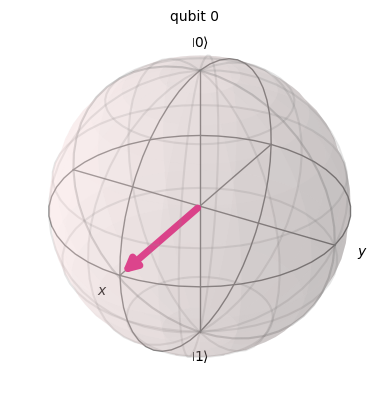

In [4]:
from math import pi
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc_h = QuantumCircuit(1)
qc_h.h(0)
state = Statevector.from_instruction(qc_h)
plot_bloch_multivector(state)

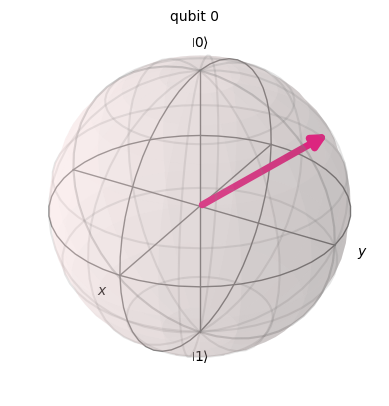

In [5]:
import qiskit
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(2*pi/3,0)
qc.rx(pi/5,0)

state=Statevector.from_instruction(qc)
plot_bloch_multivector(state)

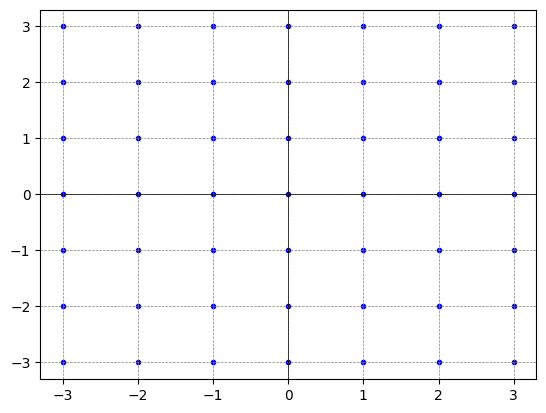

In [5]:
import matplotlib.pyplot as plt

def create_grid(n):
    """원점을 기준으로 한 격자점 생성"""
    x_points = list(range(-n, n + 1))
    y_points = list(range(-n, n + 1))

    # 격자 생성
    grid_points = [(x, y) for x in x_points for y in y_points]

    return grid_points

def plot_grid(grid_points):
    """격자점을 시각화"""
    x_values, y_values = zip(*grid_points)
    plt.scatter(x_values, y_values, marker='.', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# 격자의 크기 설정 (예: 3x3 격자)
grid_size = 3

# 격자 생성
grid_points = create_grid(grid_size)

# 격자 시각화
plot_grid(grid_points)

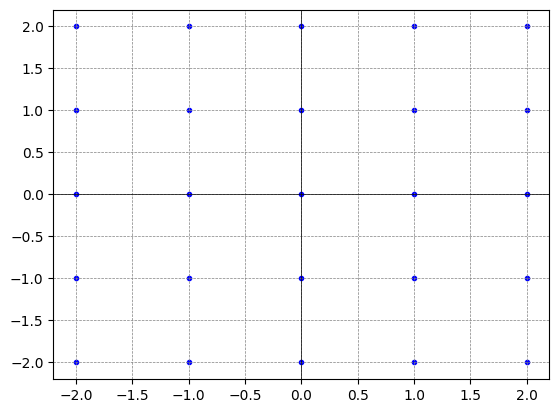

In [2]:
grid_size = 2

# 격자 생성
grid_points = create_grid(grid_size)

# 격자 시각화
plot_grid(grid_points)

In [6]:
import numpy as np

def create_quadrant_points(n):
    """1사분면에 있는 좌표 생성"""
    x_points = np.arange(0, n)
    y_points = np.arange(0, n)

    # 1사분면 좌표 생성
    quadrant_points = np.array(np.meshgrid(x_points, y_points)).T.reshape(-1, 2)

    return quadrant_points

def mirror_quadrant_points(quadrant_points):
    """1사분면 좌표를 2, 3, 4분면에 대응되는 좌표로 변환"""
    mirrored_points = np.vstack([
        quadrant_points,  # 1사분면
        np.flip(quadrant_points, axis=1),  # 2사분면
        np.flip(quadrant_points, axis=0) * [-1, 1],  # 3사분면
        np.flip(quadrant_points, axis=0) * [-1, -1]  # 4사분면
    ])

    return mirrored_points

# 좌표 생성 (예: 3개 좌표)
n_points = 3
quadrant_points = create_quadrant_points(n_points)

# 1사분면 좌표를 2, 3, 4분면에 대응되는 좌표로 변환
mirrored_points = mirror_quadrant_points(quadrant_points)

print("1사분면 좌표:")
print(quadrant_points)

print("\n전체 좌표:")
print(mirrored_points)

1사분면 좌표:
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]

전체 좌표:
[[ 0  0]
 [ 0  1]
 [ 0  2]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 0  0]
 [ 1  0]
 [ 2  0]
 [ 0  1]
 [ 1  1]
 [ 2  1]
 [ 0  2]
 [ 1  2]
 [ 2  2]
 [-2  2]
 [-2  1]
 [-2  0]
 [-1  2]
 [-1  1]
 [-1  0]
 [ 0  2]
 [ 0  1]
 [ 0  0]
 [-2 -2]
 [-2 -1]
 [-2  0]
 [-1 -2]
 [-1 -1]
 [-1  0]
 [ 0 -2]
 [ 0 -1]
 [ 0  0]]
